# Customizing Plots

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
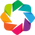

In [1]:
import pandas as pd
import numpy as np
import holoviews as hv
hv.extension('bokeh', 'matplotlib')


As introduced in the [Customization](../getting_started/2-Customization.ipynb) section of the 'Getting Started' guide, HoloViews separates the notion of content from presentation. This is achieved using a tree datastructure containing simply keyword values that specify how elements are to appear, either by type, by their ``group`` and ``label`` specification as introduced in [Annotating Data](../user_guide/01-Annotating_Data.ipynb) or for individual element instances.

In addition, HoloViews has the notion of ``Renderer`` instance that normally work behind the scenes to control how output is generated for the selected plotting extension. In this guide, we will first show how you can customize the visual styling with the options system and then how you can easily control the output options of renderers.


## Visual options and styling

The different types of visual options will be illustrated using the example introduced in the [Customization](../getting_started/2-Customization.ipynb) getting started guide. First we create a ``curve`` and a ``spikes`` element:

In [2]:
spike_train = pd.read_csv('../assets/spike_train.csv.gz')
curve  = hv.Curve(spike_train, 'milliseconds', 'Hertz')
spikes = hv.Spikes(spike_train, 'milliseconds', [])

And now we display it as we did in the getting started guide:

In [14]:
%%opts Curve [height=100 width=600 xaxis=None tools=['hover']]
%%opts Curve (color='red' line_width=1.5)
%%opts Spikes [height=100 width=600 yaxis=None] (color='grey' line_width=0.25)
curve = hv.Curve( spike_train, 'milliseconds', vdims='Hertz')
spikes = hv.Spikes(spike_train, 'milliseconds', vdims=[])
(curve + spikes).cols(1)

:Layout
   .Curve.I  :Curve   [milliseconds]   (Hertz)
   .Spikes.I :Spikes   [milliseconds]

Here it is, again, with the `.options` method, which is the simplest way of customizing because it will automatically deduce whether an option is a style, plot, or norm option. In addition, `.options` is portable across notebook environments and `.py` scripts, and also will be saved on export, unlike `%%opts`.

In [13]:
curve_opts = dict(height=100, width=600, xaxis=None, tools=[
                  'hover'], color='red', line_width=1.5)
spike_opts = dict(height=100, width=600, yaxis=None,
                  color='grey', line_width=0.25)

curve = hv.Curve(spike_train, 'milliseconds', 'Hertz')
spikes = hv.Spikes(spike_train, 'milliseconds', [])

(curve.options(**curve_opts) + spikes.options(**spike_opts)).cols(1)

:Layout
   .Curve.I  :Curve   [milliseconds]   (Hertz)
   .Spikes.I :Spikes   [milliseconds]

When using ``.options`` to apply options directly to an individual object we do not have to explicitly declare which object the options apply to, however often it is useful to set options on a composite object. In these cases the options can be declared as a dictionary of the type name and the options. The code below is therefore equivalent to the syntax we used above:

In [19]:
layout = (curve + spikes).options({'Curve': curve_opts, 'Spikes': spike_opts}).cols(1)

There is, however, one advantage in using the `%%opts` magic when working in the notebook environment, and that is %%opts magic allows tab-completion of the options which is currently unavailable with the `.options` method.
f
Additionally, across the docs, you may encounter a legacy method `.opts`, which is now superseded by the `.options` method. 

`.opts` is essentially the Python script version of `%%opts`: in both, you'll have to manually categorize whether an option is a style, plot, or norm option.

Ultimately, `.options` method is preferred because using `.opts` requires extreme verbosity in nested dictionaries, which can get  overwhelming fast.

In [18]:
curve = hv.Curve(spike_train, 'milliseconds', vdims='Hertz')
curve = curve.opts(
    dict(plot={'Curve': dict(height=100, width=600,
                             xaxis=None, tools=['hover'])},
         style={'Curve': dict(color='red', line_width=1.5)}
         )
)
spikes = hv.Spikes(spike_train, 'milliseconds', vdims=[])
spikes = spikes.opts(
    dict(plot={'Spikes': dict(height=100, width=600, yaxis=None)},
         style={'Spikes': dict(color='grey', line_width=0.25)})
)

(curve + spikes).cols(1)

:Layout
   .Curve.I  :Curve   [milliseconds]   (Hertz)
   .Spikes.I :Spikes   [milliseconds]

### Introducing ``plot`` and ``style`` options


This example allows us to expand on the concepts introduced in the [Customization](../getting_started/2-Customization.ipynb) getting started guide. First, we note that two things are immediately apparent (1) almost all the customization is going on at the top of the cell, leaving the declaration of our elements and layout nearly unchanged and (2) this customization syntax that is specific to IPython and the Jupyter notebook and is *not* valid Python. We will use this syntax in this section but it is important to note that we have regular Python equivalents to these tools as will be described shortly.

Let's start with the one difference to how our layout is declared, namely the use of ``.cols(1)`` at the end. If you delete the lines starting with ``%`` at the top of the cell and re-execute it, you will see this simply rearranges the default layout to a single column format, with the curve *above* the spikes instead of next to it.

Now let us go through the lines starting with ``%%output`` and ``%%opts``, starting with the first line:

```python
%%output size=150
```

This is the *output cell magic* which customizes the output format of a particular cell by instructing the active plotting renderer with the desired size. There is a corresponding *cell line magic* to set things globally and a ``hv.output`` utility (for both local and global settings) that you can read about below. All these output tools accept a ``size`` options which in this case sets our plot size to 150% of the default.

Next we have:

```python
%%opts Curve  [height=100 width=600 xaxis=None show_grid=False tools=['hover']]
```

This is the *opts cell magic* which customizes the visual presentation of elements displayed in a particular cell. In this case, it specifies a set of keywords relevant to our ``Curve`` element in square brackets. These list of keywords are ***plot options*** that specify the settings that HoloViews is to use to plot ``Curve`` elements.

In this case we want to make an elongated ``Curve`` plot to make it easier to view the timeseries and to allow for a corresponding elongated spikes plot underneath which is why we specified the ``width`` and ``height`` keywords. We also want to disable the ``xaxis`` (our ``Curve`` plot will give us a suitable millisecond below). Finally with ``tools=['hover']`` we add the [Bokeh hover tool](http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#hovertool) to our plot: try hovering your pointer over the red curve to see the exact values of each sample!

The next line specifies a second set of keywords relating to our ``Curve`` element:

```python
%%opts Curve (color='red' line_width=1.5)
```

In this case, our list of keywords are in *parentheses* specifying  ***style options*** with are Bokeh specific and passed down directly from HoloViews to Bokeh. The ``color`` and ``line_width`` options are *not* part of the HoloViews API but keywords used to customize the appearance of [Bokeh glyphs](http://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html).


Lastly we have use the ``%%opts`` cell magic to customize the appearance of our ``Spikes`` element:

```python
%%opts Spikes [height=100 width=600 yaxis=None] (color='grey' line_width=0.25)
```

This introduces no new concepts other than the fact that you can declare plot and style options on the same line. In these plot options, we match the elongated height and width values of the curve and disable the yaxis. In the style options we make the spikes 'grey' in color with a ``line_width`` value of 0.25.

In addition to ``plot`` and ``style`` options, there are normalization ``norm`` options that will be discussed shortly. Available options for individual elements can be listed using:

```python
# note, a backend needs to be initialized and active for hv.help to return available options
hv.help(obj)
```

Now that we have worked through concrete examples, we can now describe the syntax used in more detail.

### Option specification syntax

Here are the three types of visualization options in HoloViews:

#### Option types

##### ``style`` options:

``style`` options are passed directly to the underlying rendering backend that actually draws the plots, allowing you to control the details of how it behaves.  The default backend is matplotlib, but there are other backends either using matplotlib's options (e.g. ``mpld3``), or their own sets of options (e.g. [``bokeh``](Bokeh_Backend) ).

For whichever backend has been selected, HoloViews can tell you which options are supported, but you will need to read the corresponding documentation (e.g. [matplotlib](http://matplotlib.org/contents.html), [bokeh](http://bokeh.pydata.org)) for the details of their use. For listing available options, see the ``hv.help``-mechanism mentioned in the previous section.

HoloViews has been designed to be easily extensible to additional backends in the future, such as [Plotly](https://github.com/ioam/holoviews/pull/398), Cairo, VTK, or D3.js, and if one of those backends were selected then the supported style options would differ.

##### ``plot`` options:

Each of the various HoloViews plotting classes declares various [Parameters](http://ioam.github.io/param) that control how HoloViews builds the visualization for that type of object, such as plot sizes and labels.  HoloViews uses these options internally; they are not simply passed to the underlying backend.  HoloViews documents these options fully in its online help and in the [Reference Manual](http://holoviews.org/Reference_Manual).  These options may vary for different backends in some cases, depending on the support available both in that library and in the HoloViews interface to it, but we try to keep any options that are meaningful for a variety of backends the same for all of them. For listing available options, see the ``hv.help``-mechanism mentioned in the previous section.

##### ``norm`` options:

``norm`` options are a special type of plot option that are applied orthogonally to the above two types, to control normalization.  Normalization refers to adjusting the properties of one plot relative to those of another.  For instance, two images normalized together would appear with relative brightness levels, with the brightest image using the full range black to white, while the other image is scaled proportionally.  Two images normalized independently would both cover the full range from black to white.  Similarly, two axis ranges normalized together will expand to fit the largest range of either axis, while those normalized separately would cover different ranges. See the ``norm`` options section below. For listing available options, see the ``hv.help``-mechanism mentioned in the previous section.

#### Selecting with ``type``, ``group`` and ``label``

The three types of option mentioned above can be associated with HoloViews objects at three levels of specificity: at the level of the element *type*, by the assigned element *group* and then by the assigned *label*.

Here is an example of the three levels of specificity using different curves below:

In [ ]:
%%opts Curve (color='blue')
%%opts Curve.Sinusoid (color='red')
%%opts Curve.Sinusoid.Squared [interpolation='steps-mid'] (color='green')
xs = np.linspace(-np.pi,np.pi,100)
curve = hv.Curve((xs, xs/3))
group_curve1 = hv.Curve((xs, np.sin(xs)), group='Sinusoid')
group_curve2 = hv.Curve((xs, np.sin(xs+np.pi/4)), group='Sinusoid')
label_curve = hv.Curve((xs, np.sin(xs)**2), group='Sinusoid', label='Squared')
layout = curve * group_curve1 * group_curve2 * label_curve
layout

The straight line has no ``group`` and ``label`` so it gets 'blue' from the ``Curve`` level of specificity. The two sine curves are red as they both have the ``group`` specification of 'Sinusoid'. Lastly we has a sine squared curve with the same ``group`` label of 'Sinusoid' but it also has the ``label`` 'Squared' which is why it is green.

#### Dictionary format

HoloViews avoids string parsing and special syntax (other than the basic operators described in [Composing Elements](./02-Composing_Elements.ipynb)) where possible. For this reason, all options are fundamentally reduced to a simple dictionary format. For example, here is the pure Python equivalent of the options shown above, using the legacy ``opts`` method that will be described shortly:

In [ ]:
dict_spec = {'Curve': {'style':dict(color='blue')}, 
             'Curve.Sinusoid': {'style':dict(color='red')}, 
             'Curve.Sinusoid.Squared ': {'style':dict(color='green'),
                                         'plot':dict(interpolation='steps-mid')}}

dcurve = hv.Curve((xs, xs/3))
dgroup_curve1 = hv.Curve((xs, np.sin(xs)), group='Sinusoid')
dgroup_curve2 = hv.Curve((xs, np.sin(xs+np.pi/4)), group='Sinusoid')
dlabel_curve = hv.Curve((xs, np.sin(xs)**2), group='Sinusoid', label='Squared')
dlayout = dcurve * dgroup_curve1 * dgroup_curve2 * dlabel_curve
dlayout.opts(dict_spec)

Although it is as simple as possible, this format is tedious and verbose to use: HoloViews allows you to specify *all* your options separate from your elements in one specifiation which means there is a minimum possible complexity. For this reason, the most commonly used format is the succinct string format describe below, which is parsed into the dictionary format behind the scenes.

#### Simplified format

The dictionary format above can be quite cumbersome to work with, therefore HoloViews provides a simpler ``.options`` method, which automatically distinguishes between ``plot``, ``style`` and ``norm`` options. We can take advantage of this to easily apply a mixture of options:

In [ ]:
hv.Curve((xs, np.sin(xs))).options(width=500, color='red')

In a simple case like above where we are setting options that apply to the ``Curve`` element directly on a ``Curve`` we do not need to qualify further. However, when we are a composite object like an ``Overlay`` or ``Layout``, we have to be explicit about the object we are customizing, again using the ``type[[.group].label]`` specification.

In [ ]:
curve = hv.Curve((xs, np.sin(xs+np.pi/4)))
stepped_curve = hv.Curve((xs, np.sin(xs)**2), group='Stepped')
area = hv.Area((xs, np.sin(xs)**2))
negative_area = hv.Area((xs, -(np.sin(xs)**2)), group='Negative')

options = {'Curve': dict(width=500, color='red'),
           'Curve.Stepped': dict(color='green', interpolation='steps-mid'),
           'Area.Negative': dict(color='red')}

(curve * stepped_curve + area * negative_area).options(options)

#### Yaml equivalent

HoloViews defines its own string options specification format described in the next section. Although HoloViews does not support yaml directly, it is instructive to see how the dictionary format is expressed in [yaml](https://en.wikipedia.org/wiki/YAML):

```
Curve:
    style: {color: 'blue'}
Curve.Sinusoid:
    style: {color: 'red'}
Curve.Sinusoid.Squared:
    style: {color: 'green'}
    plot:  {interpolation: 'steps-mid'}
```

The reason HoloViews does not encourage the use of yaml is that yaml to literals and cannot express richer objects that can be used in options such as ``Cycle`` or ``Palette``.

#### String format

We have seen the string format in this notebook as passed to the ``%%opts`` cell magic. Here is the definition of this format which is just a succinct way of specifing the dictionary format:

```
[[path] [normalization] [plotting options] [style options]]+

path:             A dotted type.group.label specification
                  (e.g. Image.Grayscale.Photo)

normalization:    List of normalization options delimited by braces.
                  One of | -axiswise | -framewise | +axiswise | +framewise |
                  E.g. { +axiswise +framewise }

plotting options: List of plotting option keywords delimited by
                  square brackets. E.g. [show_title=False]

style options:    List of style option keywords delimited by
                  parentheses. E.g. (lw=10 marker='+')
```


### Applying options

Here are the different ways of applying the options specifications and the accepted format:

* *The ``%%opts`` cell magic*: IPython specific syntax applies to displayed object *[string format]*
* *The ``%opts`` line magic*: IPython specific syntax applied globally *[string format]*
* *The ``.opts`` method*: Pure python method of HoloViews objects *[string format, dictionary format]*.
* *The ``.options`` method*: Higher level pure python method of HoloViews objects *[dictionary format]*.
* *The ``hv.opts`` utility*: Pure python equivalent to ``%opts`` and ``%%opts`` *[string format, dictionary format]*


Across all environments, the recommended approach is to use ``.options``, and if you are unsure about the available options, you can apply `hv.help(obj)`, which will list all the available options for a given backend. If you are in a notebook environment, you may also utilize the tab completion ability from the ``%opts`` and ``%%opts`` magic.

For the sake of completeness though: use ``%opts`` for global settings at the top of the notebook, then ``%%opts`` to customize the output of specific cells and finally the ``.opts`` method if you need backward compatibility of HoloViews. The ``hv.opts`` utility is mostly intended for use in Python scripts if you are used to the ``%opts`` syntax or copying from notebook.

#### ``%%opts``

As shown in the examples above, customizes a particular HoloViews output displayed in a code cell. This application is not global and persists for that object which means settings stay in place if the object is re-displayed. Only accepts the string specification format. All cell magics need to appear *above* any code in the cells they are used in and cannot be used if there is no code in the cell. Only accepts the string specification syntax.

#### ``%opts``

The ``%opts`` line magic is used to set global settings at the level of the notebook they are used in. If there are options you want to use throughout a notebook, they should be specified with ``%opts`` at the top of the notebook. Line magics can appear anywhere at the start of a line, whether in isolation or anywhere inside a cell containing code. Only accepts the string specification syntax.

#### ``.opts`` method

Used to specify options to a specific holoviews object. Legacy method.

In [ ]:
hv.Overlay([hv.Curve((xs, np.sin(xs)**(i+1))).opts(style=dict(color=color, alpha=(i+1)/3.0)) 
            for (i, color) in enumerate(['red','green','blue'])])

#### ``.options`` method

Similar to the ``.opts`` method but allows the use of the simplified, flattened specification of keywords:

In [ ]:
hv.Overlay([hv.Curve((xs, np.sin(xs)**(i+1))).options(color=color, alpha=(i+1)/3.0)
            for (i, color) in enumerate(['red','green','blue'])])



Note that you can split the dictionary format into groups using ``style``, ``plot`` and ``norm`` keywords.




#### ``hv.opts`` utility

The ``hv.opts`` utility is for use in Python scripts. It can accept an object as an argment in which case it behaves like the ``%%opts`` cell magic or if it isn't supplied an object, it behaves like the ``%opts`` line magic. Accepts either the string or dict specification format.

## Customizing output

In addition to style and plot options, you may want to specify the active plotting extension, the output format, the output size and other similar options. Here is how you can do this:


*  *The ``%%output`` cell magic*: IPython specific syntax applies to displayed object *[string format]*
* *The ``%output`` line magic*: IPython specific syntax applied globally *[string format]*
* *The ``hv.output`` utility*: Pure python equivalent to ``%output`` and ``%%output`` *[string format, dictionary format]*.

### Selecting a plotting extension

At the start of this user guide, we used:

```
hv.extension('bokeh', 'matplotlib')
```

This *enabled* both the bokeh and matplotlib plotting extensions but *activated* the bokeh extension as it was listed first. We can switch to matplotlib for a single cell:

In [ ]:
%%output backend='matplotlib'
hv.Curve((xs, np.cos(xs)))

Because we used the cell magic, matplotlib was only used for that cell and bokeh is still active. We can now change the size of the ``label_curve`` we customized in bokeh earlier (with the ``%%opts`` cell magic) using the ``output`` cell magic and save it to an HTML file in disk by supplying a filename:

In [ ]:
%%output size=80 filename='small_curve'
label_curve

### ``%output``

The ``%output`` line magic acts exactly like the ``%%output`` cell magic except it acts globally. For instance, you can use this at the top of a notebook to make all visualizations bigger or smaller.

### ``hv.output`` utility

The ``hv.output`` utility is the pure Python version of the magics which can accept keyword dictionaries as well as the string format used above. If supplied with an object, acts like the cell magic but this will have no effect unless a filename is supplied to save output to disk (see below). If not object is supplied, acts like the ``%output`` line magic.


### Other output options

Here are some of the other options supported by the output utilities and magics:

* ``size``: Output size as a percentage of the original size.
* ``filename``: Cell magic or ``hv.output`` utility only. Save output to given filename.
* ``fig``: Output format for single frames. Options are backend dependent.
* ``holomap``: Display format for ``HoloMap``, can be 'widgets', 'scrubber' (DVD-style controls), or (animated) 'gif'
* ``dpi``: The output resolution (where applicable)

Using the output and options system together, you should be able to customize your plots to your liking in a succinct manner.
